In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
fr = pd.DataFrame()

flights_to_add = ['N211LB', 'N226LB', 'N235LB', 'N238LB', 'N252LB', 'N271LB', 'N329LB', 'N789LB']

min_pts_list = ['1416']

for loon in flights_to_add:
    
    for mp in min_pts_list:

        aux = pd.read_csv('../../../../og_data/DBSCAN/' + 'eps2.5/' +  loon \
                          + '/CL-' + loon 
                          + '-mp_'+ str(mp) +  '.csv', \
                          parse_dates=['ts'], low_memory=False)

        aux['eps'] = 0.00039
        aux['min_pts'] = mp


        fr = fr.append(aux)
    

In [3]:
bl = fr

In [4]:
bl['stationary'] = bl['cluster'].apply(lambda x: True if x != -1 else False)
bl

,ts,aircraft_id,alt,speed,Direction,registration_id,lat,lon,cluster,eps,min_pts,stationary
0,2018-04-20 18:56:32+00:00,HBAL088,63200,3,146,N211LB,-10.649057,-33.865551,0,0.00039,1416,True
1,2018-04-20 18:56:51+00:00,HBAL088,63200,4,165,N211LB,-10.649337,-33.865406,0,0.00039,1416,True
2,2018-04-20 18:57:06+00:00,HBAL088,63200,4,180,N211LB,-10.649597,-33.865402,0,0.00039,1416,True
3,2018-04-20 18:57:28+00:00,HBAL088,63200,4,165,N211LB,-10.649988,-33.865356,0,0.00039,1416,True
4,2018-04-20 18:57:49+00:00,HBAL088,63200,5,180,N211LB,-10.650421,-33.865356,0,0.00039,1416,True
...,...,...,...,...,...,...,...,...,...,...,...,...
198609,2019-01-07 16:47:53+00:00,HBAL523,53600,1,315,N789LB,0.853088,-73.148972,-1,0.00039,1416,False
198610,2019-01-07 16:49:40+00:00,HBAL523,53700,2,225,N789LB,0.852676,-73.149536,-1,0.00039,1416,False
198611,2019-01-07 16:49:59+00:00,HBAL523,53700,2,225,N789LB,0.852465,-73.149719,-1,0.00039,1416,False
198612,2019-01-07 18:01:06+00:00,HBAL523,53500,9,161,N789LB,0.735901,-73.122437,-1,0.00039,1416,False


In [7]:
# Do loons use roads when they want to move?

# We study only moving traces

#road_loons = bl.loc[bl.stationary == False].copy()
road_loons = bl.copy()

road_loons['parallel'] = pd.cut(road_loons['lat'], bins=range(-90, 91, 10), include_lowest=True)

road_loons['meridian'] = pd.cut(road_loons['lon'], bins=range(-180, 181, 10), include_lowest=True)

# Let's plot the tendencies of the loons to see where they like to be

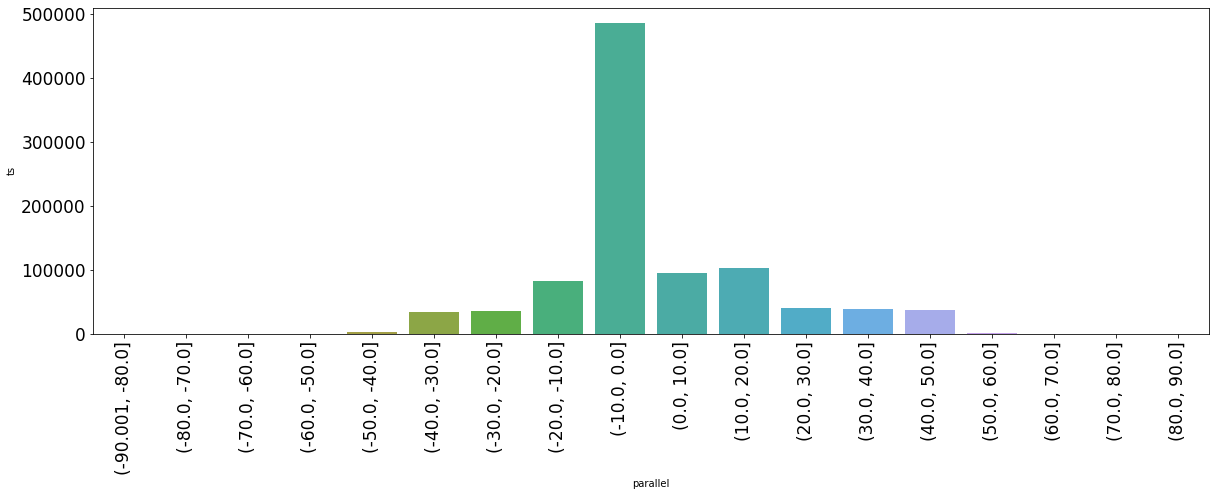

In [8]:
# Plot latitude
# VISTAZO INICIAL
plt.figure(figsize=(20,6))

road_loons_lat_point_count = road_loons.groupby('parallel').count().reset_index()

ax = sns.barplot(x=road_loons_lat_point_count['parallel'], y="ts", \
                data=road_loons_lat_point_count)

dummy = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
dummy = ax.tick_params(labelsize=17)

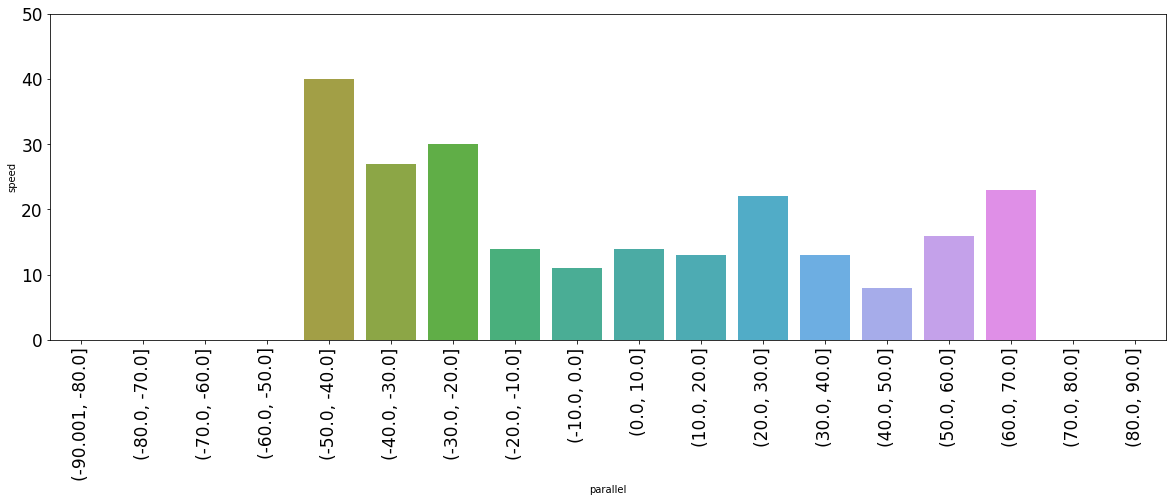

In [9]:
# How does the velocity vary?

#Plot latitude
plt.figure(figsize=(20,6))

road_loons_lat_median_velocity = road_loons.groupby('parallel').median().reset_index()

ax = sns.barplot(x=road_loons_lat_median_velocity['parallel'], y="speed", \
                data=road_loons_lat_median_velocity)
ax.set(ylim=(0, 50))
dummy = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
dummy = ax.tick_params(labelsize=17)

# We can see that as the the loon travels nearer to the equator the speed lowers


In [15]:
# How does the altitude vary?

# Let's compute the change in altitude with respect to last record
road_loon_alt_change = pd.DataFrame()

for loon in flights_to_add:
    
    loon_info = road_loons.loc[road_loons.registration_id == loon]
    
    loon_info = loon_info.sort_values('ts')
    
    loon_info['alt_since_last_record'] = loon_info['alt'] - loon_info['alt'].shift()
    loon_info['alt_since_last_record'] = loon_info['alt_since_last_record'].fillna(0)
    
    road_loon_alt_change = road_loon_alt_change.append(loon_info)
    


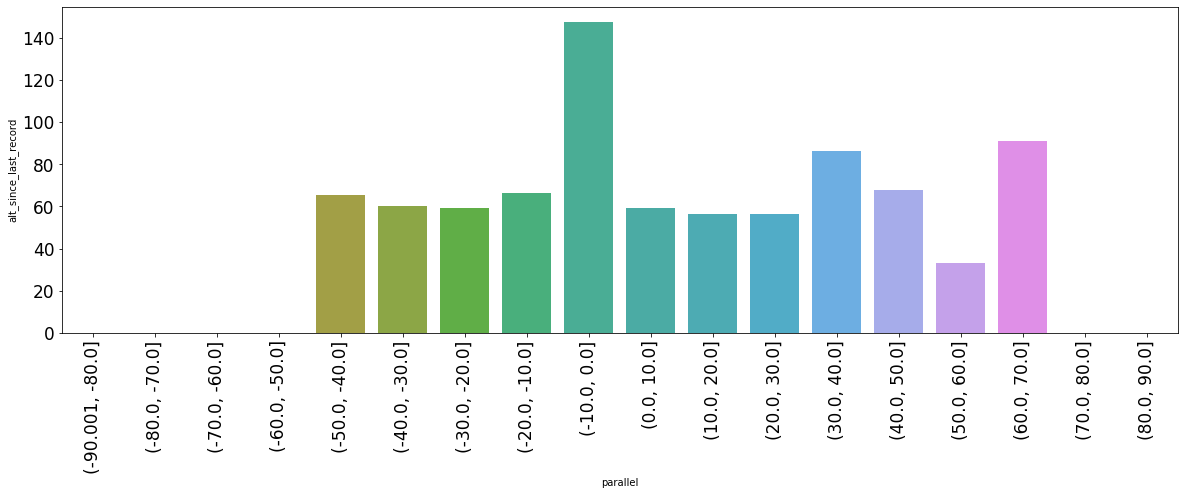

In [32]:
#Plot latitude
plt.figure(figsize=(20,6))

road_loons_alt_std_alt = road_loon_alt_change.groupby('parallel')['alt_since_last_record']\
                                                        .apply(lambda x: x.abs().mean()).reset_index()

ax = sns.barplot(x=road_loons_alt_std_alt['parallel'], y="alt_since_last_record", \
                data=road_loons_alt_std_alt)
#ax.set(ylim=(0, 50))
dummy = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
dummy = ax.tick_params(labelsize=17)
